In [6]:
import os
import numpy as np
import scipy.io as sio
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

class SynthTextDataset():
    def __init__(self, dataset_dir):
        self.dataset_dir = dataset_dir
        self._load_annotations()

    def _load_annotations(self):
        annotations = sio.loadmat(os.path.join(self.dataset_dir, "gt.mat"))

        self.imnames = annotations['imnames'][0]
        self.wordBB = annotations['wordBB'][0]
        self.charBB = annotations['charBB'][0]
        self.txt = annotations['txt'][0]

    def display_image(self, image_id):
        image_name = self.imnames[image_id][0]
        image_path = os.path.join(self.dataset_dir, image_name)
        image = Image.open(image_path)
        boxes = self.wordBB[image_id]
        txt = self.txt[image_id]

        word_bboxes = np.transpose(boxes, (2, 1, 0))
        draw = ImageDraw.Draw(image)

        for bbox in word_bboxes:
            # Extract X and Y coordinates separately
            x_coordinates = [point[0] for point in bbox]
            y_coordinates = [point[1] for point in bbox]
        
            # Calculate minimum and maximum coordinates
            xmin = min(x_coordinates)
            ymin = min(y_coordinates)
            xmax = max(x_coordinates)
            ymax = max(y_coordinates)
            
            # Draw rectangle
            draw.rectangle([xmin, ymin, xmax, ymax], outline="red")
        
        print(txt)
        plt.imshow(image)
        plt.title('Image with bounding boxes')
        plt.axis('off')
        plt.show()

In [7]:
# Usage example
dataset = SynthTextDataset(dataset_dir=r'C:\Users\IsaacStalley\Documents\GitHub\SynthText\SynthText')

['weak.                              '
 'human                              '
 'Apr 1993 18:00:26\n    Lines: 15    '
 'exept now                          ']


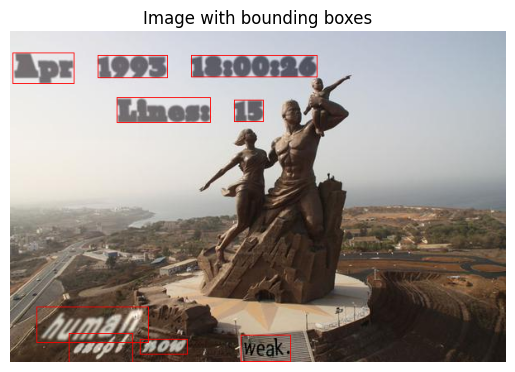

In [8]:
dataset.display_image(60000)